Nama : Arif Muhammad Laduni

NIM : 1103213003

Lecture 7: XGBoost

dataset: melb_data.csv

In [1]:
# Import library Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount (pasang) Google Drive pada direktori /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library Pandas dan menggantikan 'pd' sebagai alias untuk penggunaan lebih lanjut
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Membaca file CSV yang berisi data ke dalam sebuah DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/melb_data.csv')

#Menampilkan isi dari dataset
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
# Ini adalah kode untuk menampilkan informasi tentang objek pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [10]:
# Pilih subset dari predictor (variabel independen) yang akan digunakan dalam analisis.
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

# Buat dataframe 'X' yang hanya berisi kolom-kolom yang terdapat dalam 'cols_to_use'.
X = df[cols_to_use]
# Select target
y = df.Price

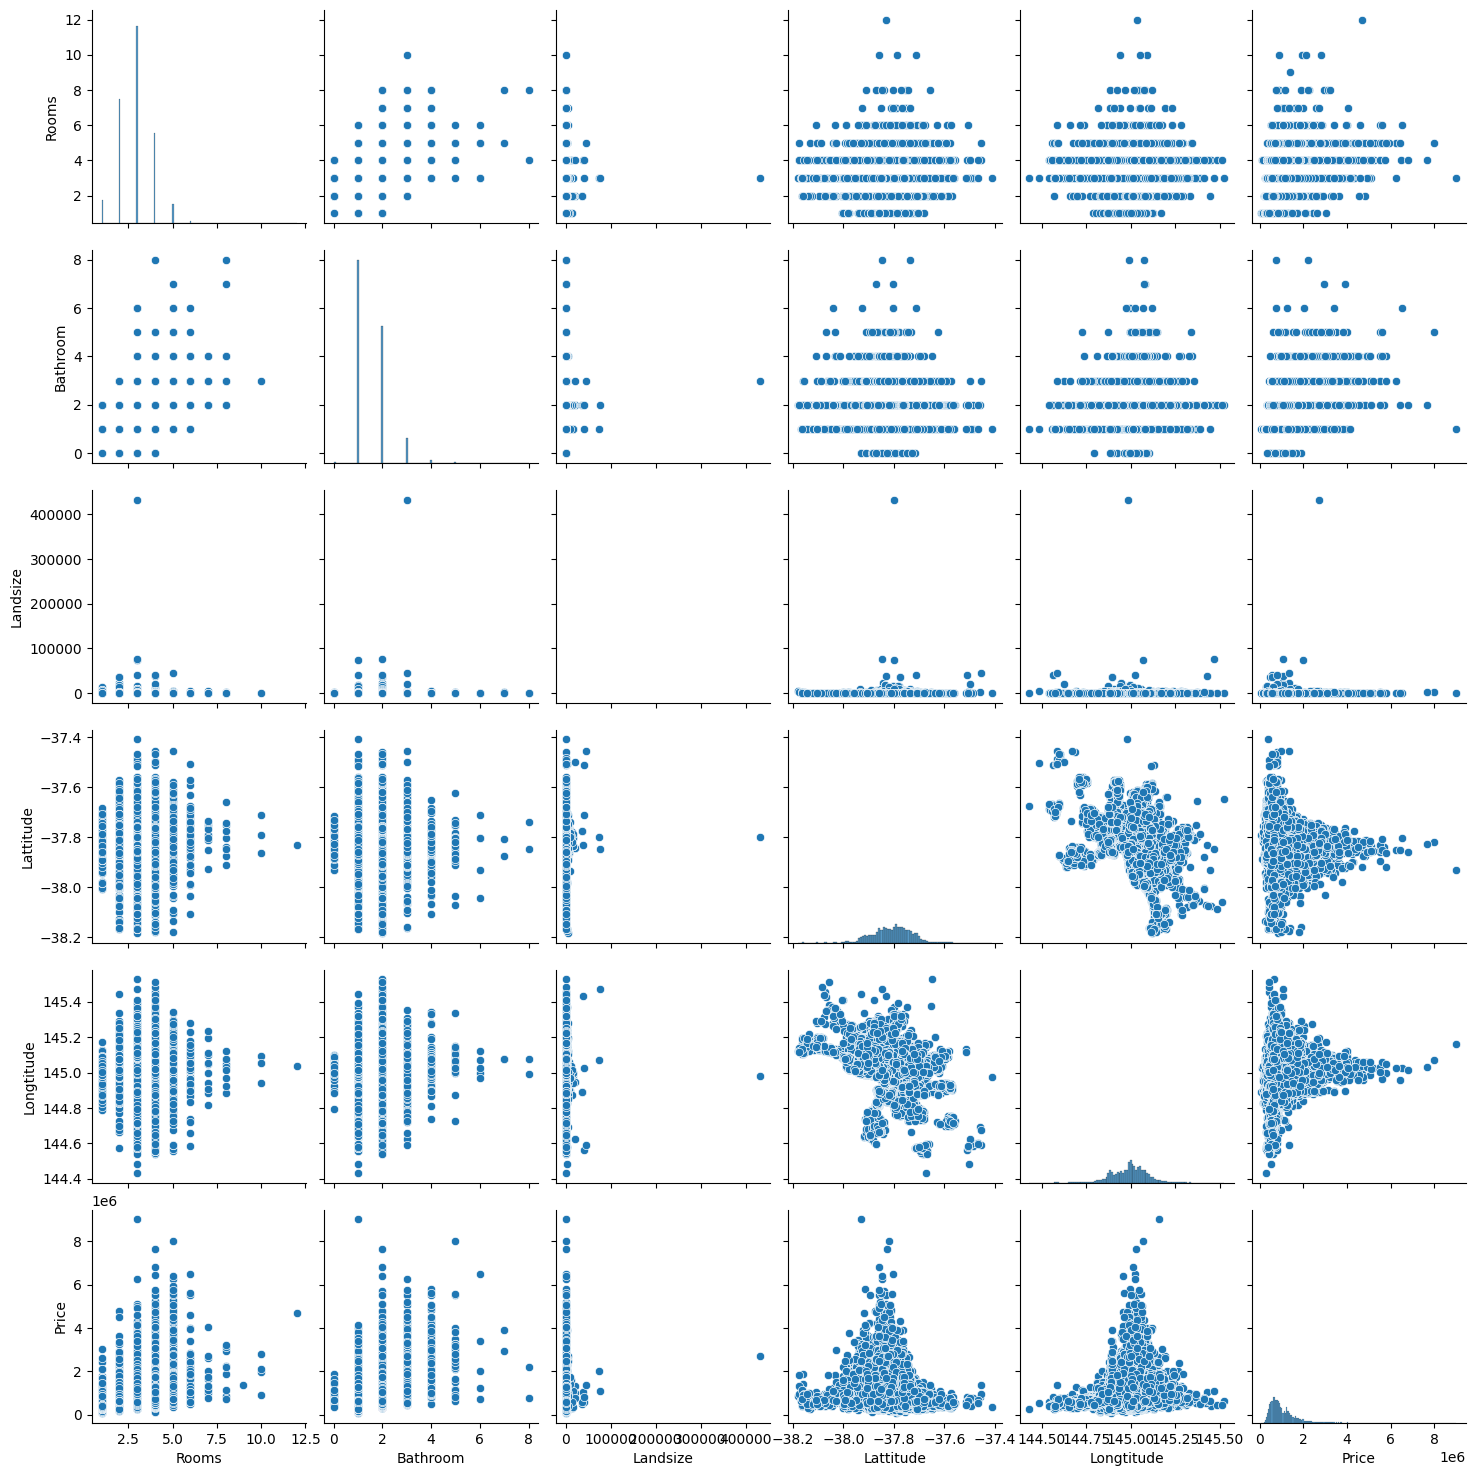

In [18]:
# Visualize data
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
sns.pairplot(df[features + ['Price']])
plt.show()

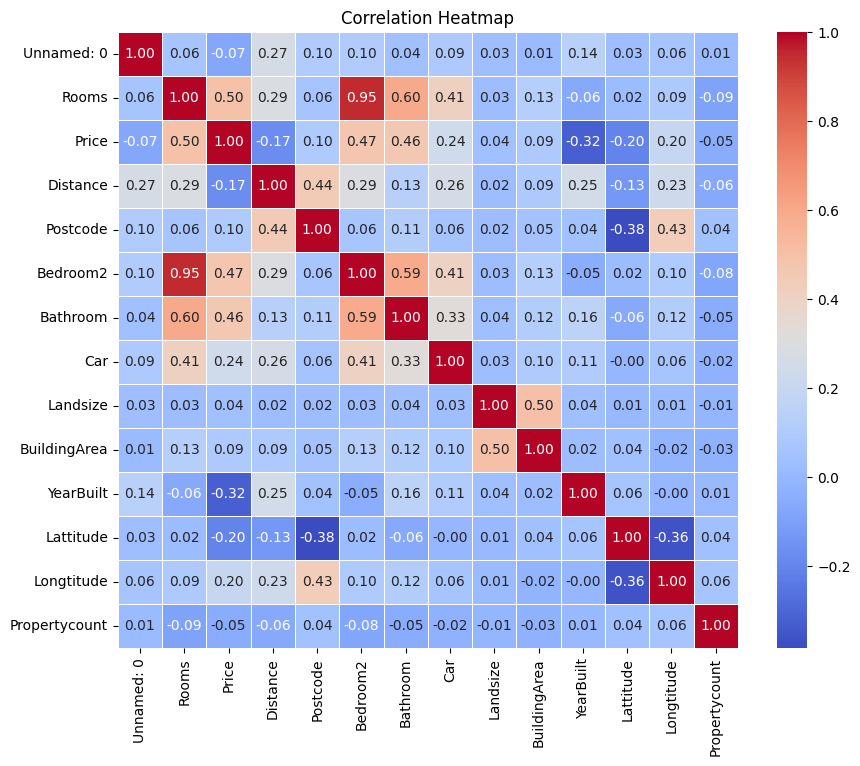

In [7]:
# Filter numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation coefficients
correlation_matrix = numeric_data.corr()

# Display Pearson correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pelatihan Model

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train models
models = {
    'XGBoost': XGBRegressor(random_state=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{name} MAE: {mae}')

XGBoost MAE: 250770.87304439777


In [12]:
# Mengimpor modul mean_absolute_error dari sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Melakukan prediksi menggunakan model (my_model) pada data validasi (X_valid)
predictions = my_model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) antara prediksi dan nilai target aktual (y_valid)
# dan mencetak hasilnya
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 244461.63191503217
